In [42]:
import pandas as p
b = p.read_csv("bakery_business.csv")

In [43]:
b.loc[b.NoiseLevel == "u'quiet'", 'NoiseLevel'] = "'quiet'"
b.loc[b.NoiseLevel == "u'average'", 'NoiseLevel'] = "'average'"
b.loc[b.NoiseLevel == "u'loud'", 'NoiseLevel'] = "'loud'"
b.loc[b.NoiseLevel == "u'very_loud'", 'NoiseLevel'] = "'very_loud'"

In [44]:
b.loc[b.Alcohol == "u'beer_and_wine'", 'Alcohol'] = "'beer_and_wine'"
b.loc[b.Alcohol == "u'full_bar'", 'Alcohol'] = "'full_bar'"
b.loc[b.Alcohol == "u'none'" , 'Alcohol'] = "'none'"

In [45]:
b.loc[b.RestaurantsAttire == "u'casual'", 'RestaurantsAttire'] = "'casual'"
b.loc[b.RestaurantsAttire == "u'dressy'", 'RestaurantsAttire'] = "'dressy'"
b.loc[b.RestaurantsAttire == "u'formal'", 'RestaurantsAttire'] = "'formal'"

In [46]:
b.loc[b.WiFi == "u'free'", 'WiFi'] = "'free'"
b.loc[b.WiFi == "u'paid'", 'WiFi'] = "'paid'"
b.loc[b.WiFi == "u'no'", 'WiFi'] = "'no'"

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
from scipy.stats import ks_2samp

b[b.business_id == '4CxF8c3MB7VAdY8zFb2cZQ']['RestaurantsGoodForGroups']

b[b.business_id == '4CxF8c3MB7VAdY8zFb2cZQ']['name']

In [48]:
selected  = ['stars',  'BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'NoiseLevel','RestaurantsGoodForGroups', 'Alcohol','GoodForKids',
 'HasTV',
 'DriveThru',
 'WiFi',
'street',
 'garage',
 'Music']

In [50]:
picked_bakery = b[b.business_id == '4CxF8c3MB7VAdY8zFb2cZQ'][selected] # bakery we want to analyse
picked_bakery

,stars,BusinessAcceptsCreditCards,RestaurantsPriceRange2,NoiseLevel,RestaurantsGoodForGroups,Alcohol,GoodForKids,HasTV,DriveThru,WiFi,street,garage,Music
1371,3.5,True,1.0,NaN,True,'none',True,NaN,NaN,NaN,True,False,0


In [9]:
five_star = b[(b['city'] == 'Portland') & (b['stars'] == 5.0)][selected] # all five-star bakeries in portland

In [10]:
five_mode = five_star.mode()

In [11]:
final = picked_bakery.append(five_mode)

In [12]:
diff = []
for item in selected:
    if final[item][1371] != final[item][0]:
        diff.append(item)
        print(item)

stars
RestaurantsPriceRange2
NoiseLevel
HasTV
DriveThru
WiFi
BusinessAcceptsBitcoin
BYOBCorkage
BYOB
background_music
live
dinner


In [13]:
portland = b[b.city == 'Portland'][selected]

In [5]:
portland.loc[portland.NoiseLevel == "u'quiet'", 'NoiseLevel'] = "'quiet'"
portland.loc[portland.NoiseLevel == "u'average'", 'NoiseLevel'] = "'average'"
portland.loc[portland.NoiseLevel == "u'loud'", 'NoiseLevel'] = "'loud'"
portland.loc[portland.NoiseLevel == "u'very_loud'", 'NoiseLevel'] = "'very_loud'"

In [6]:
portland.loc[portland.WiFi == "u'free'", 'WiFi'] = "'free'"
portland.loc[portland.WiFi == "u'paid'", 'WiFi'] = "'paid'"
portland.loc[portland.WiFi == "u'no'", 'WiFi'] = "'no'"

In [7]:
portland.loc[portland.Alcohol == "u'beer_and_wine'", 'Alcohol'] = "'beer_and_wine'"
portland.loc[portland.Alcohol == "u'full_bar'", 'Alcohol'] = "'full_bar'"
portland.loc[portland.Alcohol == "u'none'" , 'Alcohol'] = "'none'"

In [18]:
diff.remove('stars')

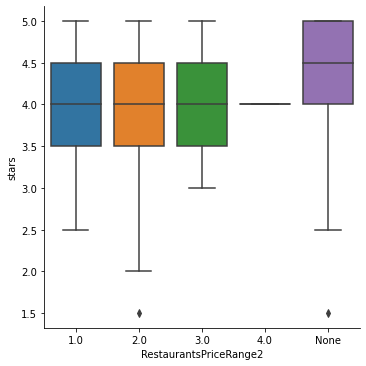

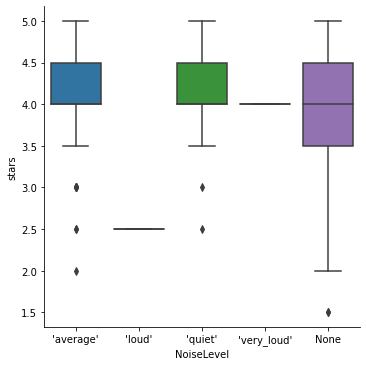

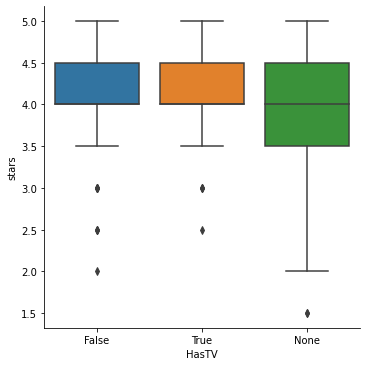

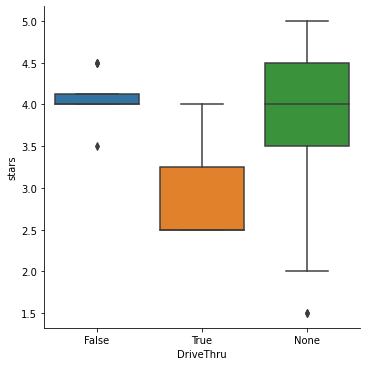

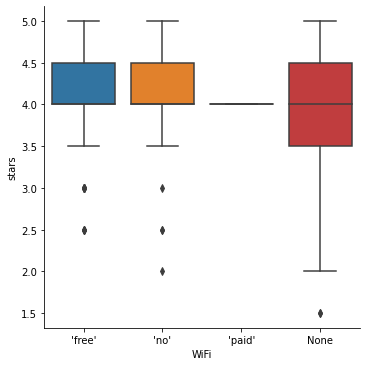

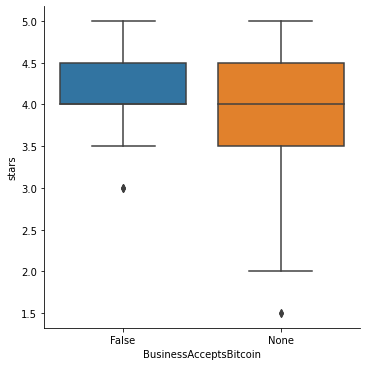

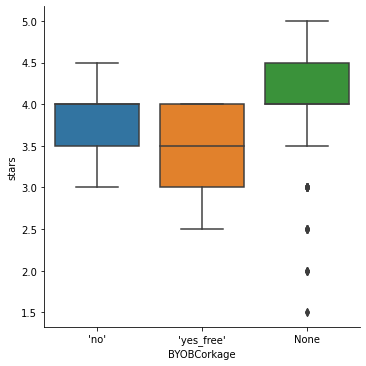

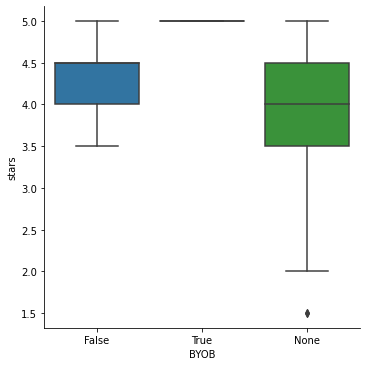

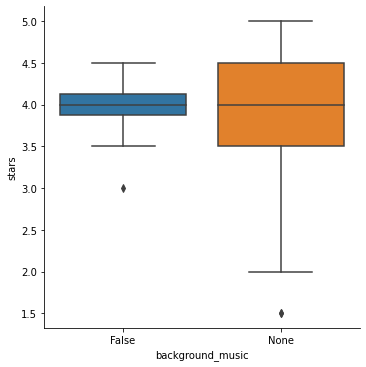

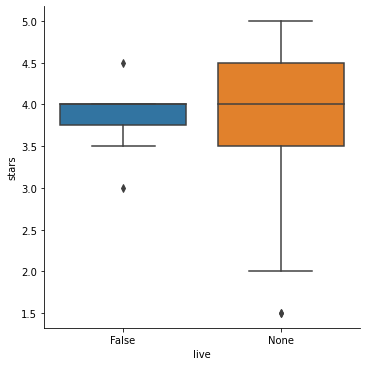

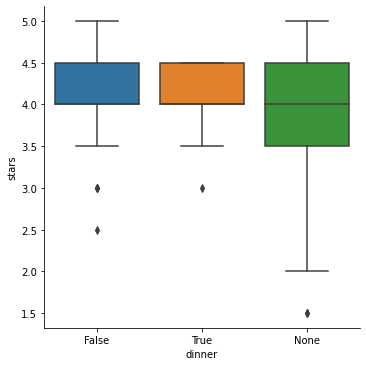

In [19]:
data = p.DataFrame()
data['stars'] = portland['stars']
for item in diff:
    d = portland[item]
    d = p.Categorical(d)
    if 'None' in d:
        d = d.fillna('None')
    else:
        d = d.add_categories('None').fillna("None")
    d.replace('none', 'None')
    d.replace("'none'", "None")
    data[item] = d
    sns.catplot(x = item, y='stars', kind="box", data = data).savefig(str(item)+'.png')

In [14]:
five_mode[diff] 

,stars,RestaurantsPriceRange2,NoiseLevel,HasTV,DriveThru,WiFi,BusinessAcceptsBitcoin,BYOBCorkage,BYOB,background_music,live,dinner
0,5.0,2.0,'average',False,NaN,'free',False,NaN,False,NaN,NaN,False


In [21]:
picked_bakery[diff]

,RestaurantsPriceRange2,NoiseLevel,HasTV,DriveThru,WiFi,BusinessAcceptsBitcoin,BYOBCorkage,BYOB,background_music,live,dinner
1371,1.0,NaN,NaN,NaN,NaN,NaN,'yes_free',NaN,NaN,NaN,NaN


In [ ]:
#scipy.stats.ttest_ind(portland.loc['HasTV'], two_data.loc['cat2'], equal_var=False)

In [63]:
# ---------------start from here--------------------------

In [66]:
high = b[b['stars'] == 5.0][selected] # five_star bakeries in all dataset
mode = high.mode()
len(high)

282

In [52]:
compare = picked_bakery.append(mode)
compare

,stars,BusinessAcceptsCreditCards,RestaurantsPriceRange2,NoiseLevel,RestaurantsGoodForGroups,Alcohol,GoodForKids,HasTV,DriveThru,WiFi,street,garage,Music
1371,3.5,True,1.0,NaN,True,'none',True,NaN,NaN,NaN,True,False,0
0,5.0,True,2.0,'quiet',False,'none',True,False,False,'free',False,False,0


In [53]:
c_diff = []
for item in selected:
    if compare[item][1371] != compare[item][0]:
        c_diff.append(item)
        print(item)

stars
RestaurantsPriceRange2
NoiseLevel
RestaurantsGoodForGroups
HasTV
DriveThru
WiFi
street


In [54]:
high = high[c_diff]
picked = picked_bakery[c_diff]

In [55]:
np.mean(b['stars'])

3.846512985118179

In [56]:
for item in c_diff:
    print(high[item].value_counts())
# price_range, noise_level, goodforgroups

5.0    282
Name: stars, dtype: int64
2.0    78
1.0    75
3.0     7
Name: RestaurantsPriceRange2, dtype: int64
'quiet'      23
'average'    17
Name: NoiseLevel, dtype: int64
False    16
True     15
Name: RestaurantsGoodForGroups, dtype: int64
False    39
True      8
Name: HasTV, dtype: int64
False    2
True     1
Name: DriveThru, dtype: int64
'free'    50
'no'      27
Name: WiFi, dtype: int64
False    108
True      83
Name: street, dtype: int64


In [57]:
compare[c_diff]

,stars,RestaurantsPriceRange2,NoiseLevel,RestaurantsGoodForGroups,HasTV,DriveThru,WiFi,street
1371,3.5,1.0,NaN,True,NaN,NaN,NaN,True
0,5.0,2.0,'quiet',False,False,False,'free',False


In [58]:
import statsmodels.api as sm
model = sm.OLS.from_formula('stars ~ RestaurantsPriceRange2+NoiseLevel+RestaurantsGoodForGroups+HasTV+WiFi+street', b).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     17.58
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           1.05e-29
Time:                        13:02:29   Log-Likelihood:                -924.76
No. Observations:                 991   AIC:                             1872.
Df Residuals:                     980   BIC:                             1925.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            3.9577      0.081     49.027      0.000       3.799       4.116
NoiseLevel[T.'loud']                -0.0737      0.097     -0.761      0.447      -0.264       0.116
NoiseLevel[T.'quiet']                0.2215      0.047      4.723      0.000       0.129       0.313
NoiseLevel[T.'very_loud']            0.0805      0.279      0.288      0.773      -0.467       0.628
RestaurantsGoodForGroups[T.None]  2.937e-16   9.29e-16      0.316      0.752   -1.53e-15    2.12e-15
RestaurantsGoodForGroups[T.True]    -0.1461      0.048     -3.013      0.003      -0.241      -0.051
HasTV[T.None]                     5.546e-16   2.12e-15      0.261      0.794   -3.61e-15    4.72e-15
HasTV[T.True]                       -0.2335      0.040     -5.778      0.000      -0.313      -0.154
WiFi[T.'no']                         0.1228      0.045      2.732      0.006       0.035       0.211
WiFi[T.'paid']                       0.1031      0.358      0.288      0.774      -0.600       0.806
WiFi[T.None]                         0.0794      0.620      0.128      0.898      -1.137       1.296
street[T.True]                       0.2590      0.040      6.420      0.000       0.180       0.338
RestaurantsPriceRange2              -0.1500      0.039     -3.873      0.000      -0.226      -0.074
==============================================================================
Omnibus:                       49.012   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.292
Skew:                          -0.576   Prob(JB):                     9.85e-13
Kurtosis:                       3.109   Cond. No.                     5.01e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.74e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# noise level: quiet 
# goodforgroups: false (agree with the tree)
# hasTV: false
# wifi: ignore as it does not agree with the mode of 5_star bakeries
# street: offer street parking (agree with the tree)
# price range: ingore as it does agree with the mode of 5_star bakeries

In [52]:
# -----------ends here---------------------

In [45]:
price1 = b[b['RestaurantsPriceRange2'] == 1.0]
price2 = b[b['RestaurantsPriceRange2'] == 2.0]
print(ks_2samp(price1['stars'], price2['stars']))
print(scipy.stats.ttest_ind(price1['stars'], price2['stars']))
print(np.mean(price1['stars']), np.mean(price2['stars']), 'all')
print(np.mean(portland[portland['RestaurantsPriceRange2'] == 1.0]['stars']), np.mean(portland[portland['RestaurantsPriceRange2'] == 2.0]['stars']), 'portland')

KstestResult(statistic=0.04547106465457566, pvalue=0.09739014696304382)
Ttest_indResult(statistic=1.7470704088741968, pvalue=0.0807315658732486)
3.8306451612903225 3.7836194563662375 all
4.023668639053255 3.9007936507936507 portland


In [48]:
np.median(price1['stars']), np.median(price2['stars'])

(4.0, 4.0)

price_1or2 = b[(b['RestaurantsPriceRange2'] == 1.0 )| (b['RestaurantsPriceRange2'] == 2.0)]
sns.catplot(x = 'RestaurantsPriceRange2', y='stars', kind="box", data = price_1or2).savefig(str(item)+'.png')

In [75]:
noise_avg = b[b['NoiseLevel'] == "'average'"]
noise_nan = b[b['NoiseLevel'].isnull()]
ks_2samp(noise_avg['stars'], noise_nan['stars'])
print(scipy.stats.ttest_ind(noise_avg['stars'], noise_nan['stars']))
print(np.mean(noise_avg['stars']), np.mean(noise_nan['stars']), 'all')
na = portland[portland['NoiseLevel'].isnull()]
np.mean(portland[portland['NoiseLevel'] == "'average'"]['stars']), np.mean(na['stars'])

Ttest_indResult(statistic=-3.768203694634184, pvalue=0.0001675858736578176)
3.7530795072788354 3.86819687647894 all


(4.008064516129032, 4.039267015706806)

import matplotlib.pyplot as plt
plt.hist(noise_avg['stars'])
plt.show()
plt.hist(noise_nan['stars'])
plt.show()

In [17]:
tv_false = b[b['HasTV'] == 'False']
tv_nan = b[b['HasTV'].isnull()]
ks_2samp(tv_false['stars'], tv_nan['stars'])
print(scipy.stats.ttest_ind(tv_false['stars'], tv_nan['stars']))

Ttest_indResult(statistic=0.8052869642118048, pvalue=0.4207223087065006)


import matplotlib.pyplot as plt
plt.hist(tv_false['stars'])
plt.show()
plt.hist(tv_nan['stars'])
plt.show()

In [40]:
wifi_free = b[b['WiFi'] == "'free'"]
wifi_nan = b[b['WiFi'].isnull()]
ks_2samp(wifi_free['stars'], wifi_nan['stars'])
print(scipy.stats.ttest_ind(wifi_free['stars'], wifi_nan['stars']))
n = portland[portland['WiFi'].isnull()]
print(np.mean(portland[portland['WiFi'] == "'free'"]['stars']), np.mean(n['stars']), 'portland')
print(np.mean(wifi_free['stars']),np.mean(wifi_nan['stars']), 'all')

Ttest_indResult(statistic=-5.417748456344793, pvalue=6.525506659416214e-08)
4.068965517241379 3.975862068965517 portland
3.7431693989071038 3.8982381530984203 all


import matplotlib.pyplot as plt
plt.hist(wifi_free['stars'])
plt.show()
plt.hist(wifi_nan['stars'])
plt.show()

In [19]:
dinner_f = b[b['dinner'] == False]
dinner_nan = b[b['dinner'].isnull()]
ks_2samp(dinner_f['stars'], dinner_nan['stars'])
print(scipy.stats.ttest_ind(dinner_f['stars'], dinner_nan['stars']))

Ttest_indResult(statistic=-0.013461471044900525, pvalue=0.989260434274032)


import matplotlib.pyplot as plt
plt.hist(dinner_f['stars'])
plt.show()
plt.hist(dinner_nan['stars'])
plt.show()

In [ ]:
# price range, noise, wifi

In [20]:
b[(b['state'] == 'OR') & (b['stars'] == 5.0)].review_count

66       25
108      15
165      49
374      18
378       9
391       9
458      24
467      11
477      28
505      10
593      75
657      43
683      54
743       5
819      10
847      18
852      15
872      53
940      16
954     108
984       5
1041     63
1063      9
1064     12
1113     60
1124     34
1363     30
1723      8
1854      5
1865      6
1977      7
2021      5
2074      6
2084     23
2128     13
2187     31
2224     10
2294      7
2306      7
2437      7
2476     23
2610     30
2896     16
2946     14
2996     98
3119      6
3145      6
3281     10
3334     18
3379     19
Name: review_count, dtype: int64

In [11]:
print(b[b.business_id == 'OQ2oHkcWA8KNC1Lsvj1SBA'].street)
print(b[b.business_id == 'OQ2oHkcWA8KNC1Lsvj1SBA'].RestaurantsGoodForGroups)

908    True
Name: street, dtype: object
908    True
Name: RestaurantsGoodForGroups, dtype: object


In [12]:
print(b[b.business_id == 'itqW3t8LhYjWvjZDf-HkhQ'].street)
print(b[b.business_id == 'itqW3t8LhYjWvjZDf-HkhQ'].RestaurantsGoodForGroups)

954    True
Name: street, dtype: object
954    NaN
Name: RestaurantsGoodForGroups, dtype: object


In [67]:
portland = b[b.city == 'Portland']

In [5]:
len(portland)

348

In [28]:
two_bakeries

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,sunday,saturday,DietaryRestrictions,dairy-free,gluten-free,vegan,kosher,halal,soy-free,vegetarian
908,OQ2oHkcWA8KNC1Lsvj1SBA,Screen Door,2337 E Burnside St,Portland,OR,97214,45.523086,-122.64168,4.5,7219,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
954,itqW3t8LhYjWvjZDf-HkhQ,Oracle Coffee Company,3875 Sw Bond Ave,Portland,OR,97239,45.495169,-122.67093,5.0,108,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
two_bakeries = b[(b['business_id'] == 'itqW3t8LhYjWvjZDf-HkhQ') | (b['business_id'] == 'OQ2oHkcWA8KNC1Lsvj1SBA')]

In [34]:
selected_variables = ['stars',  'BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'NoiseLevel','RestaurantsGoodForGroups', 'Alcohol','GoodForKids',
 'HasTV',
 'DriveThru',
 'WiFi',
'street',
 'garage',
 'Music', 'BusinessAcceptsBitcoin', 'BYOBCorkage', 'BYOB', 'valet', 'background_music', 'live', 'dinner', 'BestNights']
# variables selected by box-plots last time 

In [35]:
diff = list() # list of variables that two bakeries are different
for item in two_bakeries.columns:
    if two_bakeries[item][908] != two_bakeries[item][954]:
        diff.append(item)
        #print(item)

In [54]:
# find the valid variables
valid = list(set(selected_variables).intersection(diff))
valid

['BYOB',
 'DriveThru',
 'RestaurantsGoodForGroups',
 'HasTV',
 'BYOBCorkage',
 'Alcohol',
 'BusinessAcceptsBitcoin',
 'background_music',
 'live',
 'dinner',
 'stars',
 'GoodForKids',
 'WiFi']

In [68]:
portland.loc[portland.Alcohol == "u'beer_and_wine'", 'Alcohol'] = "'beer_and_wine'"
portland.loc[portland.Alcohol == "u'full_bar'", 'Alcohol'] = "'full_bar'"
portland.loc[portland.Alcohol == "u'none'" , 'Alcohol'] = "'none'"

C:\Users\80498\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [69]:
portland[valid]

,BYOB,DriveThru,RestaurantsGoodForGroups,HasTV,BYOBCorkage,Alcohol,BusinessAcceptsBitcoin,background_music,live,dinner,GoodForKids,WiFi
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,True,False,NaN,'beer_and_wine',NaN,NaN,NaN,NaN,True,u'no'
34,NaN,NaN,False,False,NaN,'none',NaN,NaN,NaN,NaN,True,'no'
...,...,...,...,...,...,...,...,...,...,...,...,...
3379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3404,NaN,NaN,True,False,NaN,'none',NaN,NaN,NaN,False,True,'free'
3407,NaN,NaN,True,True,NaN,'none',NaN,NaN,NaN,True,True,u'no'


In [55]:
valid = valid.remove('stars')

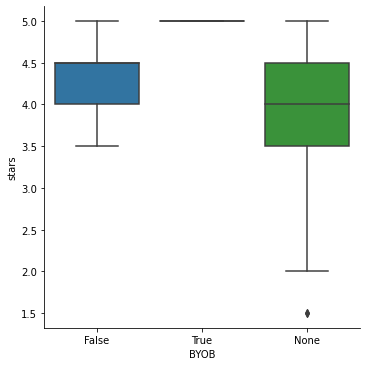

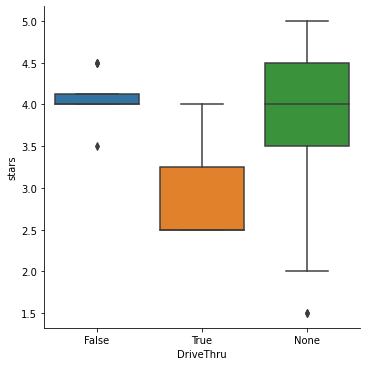

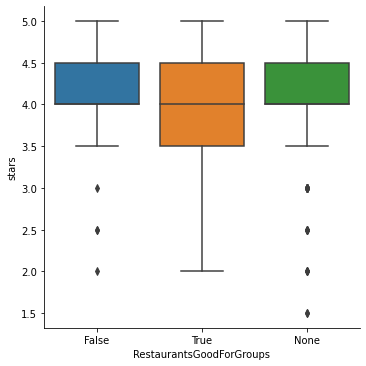

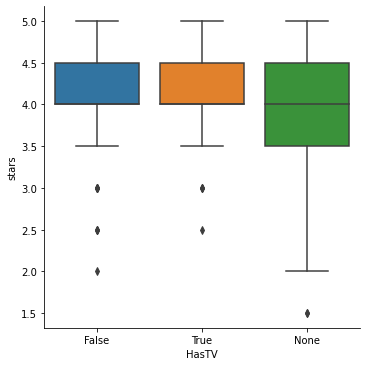

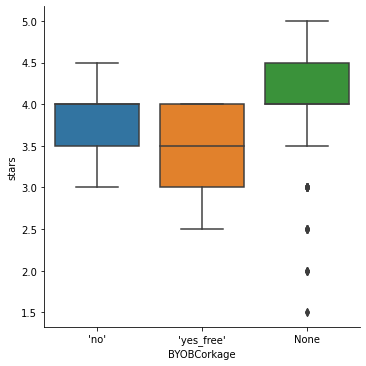

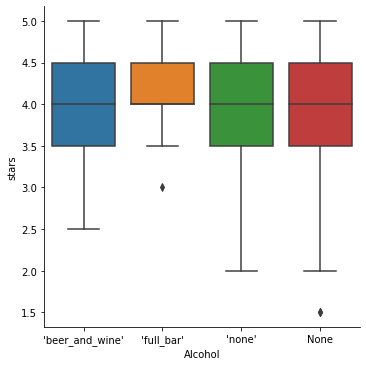

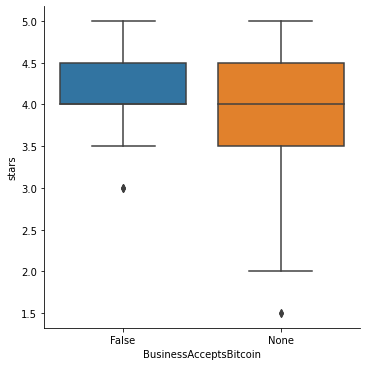

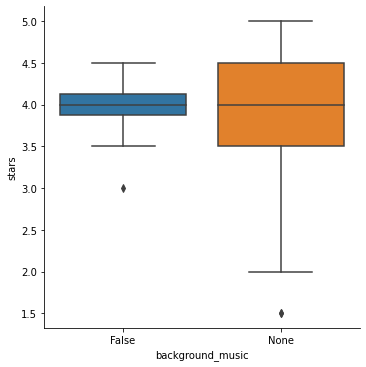

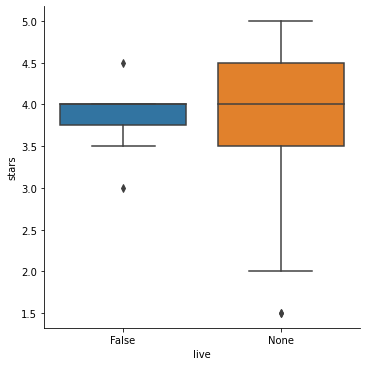

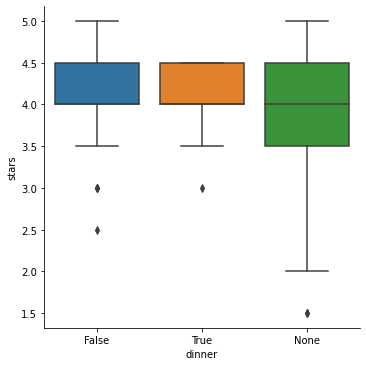

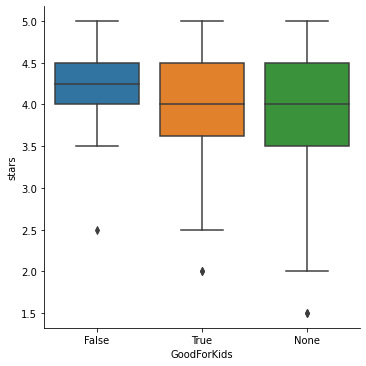

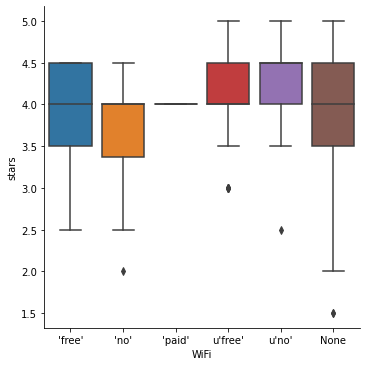

In [70]:
data = p.DataFrame()
data['stars'] = portland['stars']
for item in valid:
    d = portland[item]
    d = p.Categorical(d)
    if 'None' in d:
        d = d.fillna('None')
    else:
        d = d.add_categories('None').fillna("None")
    d.replace('none', 'None')
    d.replace("'none'", "None")
    data[item] = d
    sns.catplot(x = item, y='stars', kind="box", data = data).savefig(str(item)+'.png')

In [63]:
portland[portland.stars == 3.0]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,sunday,saturday,DietaryRestrictions,dairy-free,gluten-free,vegan,kosher,halal,soy-free,vegetarian
187,7DPJgMPt7og9rZxH_nI9Bw,Bridge City Cafe - Lloyd Center,2304 Lloyd Ctr,Portland,OR,97232,45.532551,-122.653594,3.0,44,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,0nMbLN0B5I-2tNnQLSo86w,Starbucks,1510 NE 122nd Ave,Portland,OR,97230,45.533837,-122.537340,3.0,19,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,25q3tk3fQC4_6RZobcuA4Q,Wetzel's Pretzels,"9585 SW Washington Sq., Space #J03",Portland,OR,97223,45.451128,-122.781618,3.0,10,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,Kb7V-qHRgm5uq4TzHeY3uw,Baskin-Robbins 31 Ice Cream Stores,475 NE 181st Ave,Portland,OR,97230,45.525503,-122.478777,3.0,10,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,nDnS4FV1kkMGfXcrmXKibw,The Decorette Shop,5338 SE Foster Rd,Portland,OR,97206,45.494746,-122.607535,3.0,23,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796,czeylzYMfnmOiKN9W-rN8Q,Corner Bakery Cafe,7455 SW Bridgeport Rd,Portland,OR,97224,45.395572,-122.751600,3.0,43,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011,A0zR7nuYE_P7fWCCcrwong,Madrona Hill Cafe,5937 N Greeley Ave,Portland,OR,97217,45.566267,-122.695766,3.0,39,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1138,UaXLppX03DdHu_hYNWEoIw,Franz Bakery,8440 SE 45th Ave,Portland,OR,97222,45.462769,-122.615367,3.0,8,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1293,NAmJpv_ltOSMgjEKt9tmKg,Panera Cares,4143 NE Halsey St,Portland,OR,97232,45.534601,-122.620520,3.0,68,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385,QyjMD4ZFz6U9iszDofG07g,Shari's Cafe and Pies,7451 SW Garden Home Rd,Portland,OR,97223,45.466039,-122.752702,3.0,51,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
